### Clustering 

Grouping similar entities together help profile the attributes of different groups. In other words, this will give us insight into underlying patterns of different groups.

In [1]:
# Importing the libraries
import pandas as pd
from pandas import DataFrame
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
pd.options.mode.chained_assignment = None
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=9,6
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
'''import os
print(os.getcwd())
os.chdir('D:\\DS_Notes\\Datasets_new\\')
# Importing the dataset
dataset= pd.read_csv('Mall_Customers.csv')
# displaying the data universities.csv
dataset.head()'''

"import os\nprint(os.getcwd())\nos.chdir('D:\\DS_Notes\\Datasets_new\\')\n# Importing the dataset\ndataset= pd.read_csv('Mall_Customers.csv')\n# displaying the data universities.csv\ndataset.head()"

In [3]:
dataset = pd.read_csv("../input/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


From the above data set, observe that the first 3 columns are not necessary for clustering analysis hence we don't conside them. By taking the rest of the values, create a new dataset in a numpy array.

In [4]:
X = dataset.iloc[:, [3, 4]].values
# printing first 6 rows of the dataset
X[:6]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76]])

Plot the values using scatter plot and check the graph and have a basic idea of how many clusters can be formed out of it.

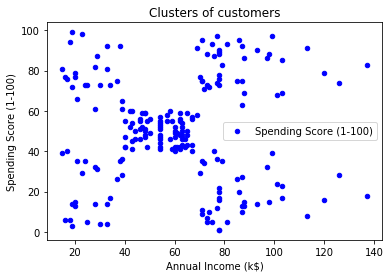

In [5]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],color='blue',s=20)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
rcParams['figure.figsize']=8,6
plt.show()

From the above graph we can predict that, we can make a rough idea that we can make 5 clusters out of it. So we shall consider the number of clusters be 5

In [6]:
# Fitting K-Means to the dataset 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 40)
# Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit(X)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=40, tol=0.0001, verbose=0)

In [7]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

### let us undersand the parameters used.

n_clusters : The number of clusters to form as well as the number of centroids to generate (An idea from above plot )


KMeans : The number of clusters to form as well as the number of centroids to generate.

random_state = random state '1' means reproducability, if any one uses the same value, they will get the the same output

n_init = Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


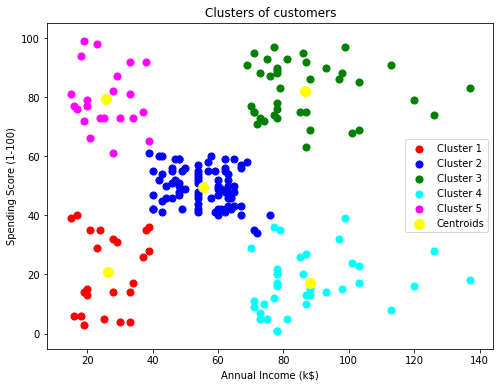

In [9]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label =
'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
plt.show()

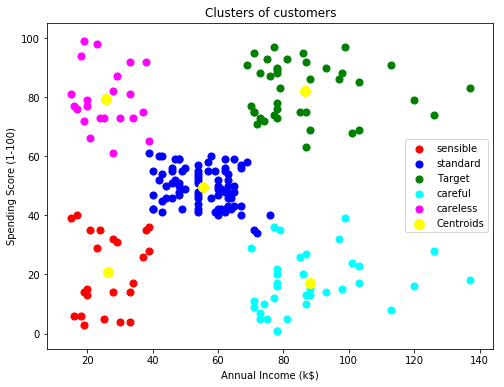

In [10]:
# naming each cluster based on the income and the amount they spend.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'sensible')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'careful')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'careless')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label ='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [11]:
# add a new column and assign the cluster values to it
dataset["clusters"] = kmeans.labels_
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


" kmeans labels "  is a single column so there is no issue in adding the column to the existing dataset

In [12]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers 

,0,1
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


Cluster centers is a dataframe as we have 2 cloumns and 5 rows, also, the existing data set has more than 5 rows. In this case, in order to merge both the datasets, there should be a common column.

In [13]:
centers["clusters"] = [0,1,2,3,4]
#centers["clusters"] = range(5) 
centers

,0,1,clusters
0,26.304348,20.913043,0
1,55.296296,49.518519,1
2,86.538462,82.128205,2
3,88.200000,17.114286,3
4,25.727273,79.363636,4


In [14]:
# performing merge operation as there are two similar columns named " clusters"
dataset = dataset.merge(centers)
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,0,1
0,1,Male,19,15,39,0,26.304348,20.913043
1,3,Female,20,16,6,0,26.304348,20.913043
2,5,Female,31,17,40,0,26.304348,20.913043
3,7,Female,35,18,6,0,26.304348,20.913043
4,9,Male,64,19,3,0,26.304348,20.913043
5,11,Male,67,19,14,0,26.304348,20.913043
6,13,Female,58,20,15,0,26.304348,20.913043
7,15,Male,37,20,13,0,26.304348,20.913043
8,17,Female,35,21,35,0,26.304348,20.913043
9,19,Male,52,23,29,0,26.304348,20.913043


In [15]:
s1_grps = pd.DataFrame(kmeans.labels_)
s1_grps.cloumns = ('clusters')
#s1_grps.rename(columns={'0': 'cluster'}, inplace=True)
#s1_grps = s1_grps.rename(columns={'0':'Cluster'},inplace=False)
s1_grps.head()

,0
0,0
1,4
2,0
3,4
4,0


In [16]:
s2_univs = dataset.iloc[:,0]
#s2_univs = dataset['CustomerID']
s2_univs.head()

0    1
1    3
2    5
3    7
4    9
Name: CustomerID, dtype: int64

In [17]:
rslt = pd.concat([s1_grps,s2_univs],axis=1)
rslt.rename(columns={'0':'Cluster'}, inplace=True)
#rslt['s2_univs'] = rslt.s2_univs.astype(int)
rslt.head(10)
#list(rslt)

,0,CustomerID
0,0,1
1,4,3
2,0,5
3,4,7
4,0,9
5,4,11
6,0,13
7,4,15
8,0,17
9,4,19


In [18]:
dataset = pd.read_csv("../input/Mall_Customers.csv")
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Now consider three input values
d = dataset.iloc[:, [2, 3, 4]]
d.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [20]:
X = dataset.iloc[:, [2, 3, 4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
dataset["clusters"] = kmeans.labels_
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [22]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers

,0,1,2
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,40.324324,87.432432,18.189189
3,43.126582,54.822785,49.835443
4,25.272727,25.727273,79.363636


In [23]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers["clusters"] = range(5) #n_clusters
dataset = dataset.merge(centers)
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,0,1,2
0,1,Male,19,15,39,0,45.217391,26.304348,20.913043
1,3,Female,20,16,6,0,45.217391,26.304348,20.913043
2,5,Female,31,17,40,0,45.217391,26.304348,20.913043
3,7,Female,35,18,6,0,45.217391,26.304348,20.913043
4,9,Male,64,19,3,0,45.217391,26.304348,20.913043
5,11,Male,67,19,14,0,45.217391,26.304348,20.913043
6,13,Female,58,20,15,0,45.217391,26.304348,20.913043
7,15,Male,37,20,13,0,45.217391,26.304348,20.913043
8,17,Female,35,21,35,0,45.217391,26.304348,20.913043
9,19,Male,52,23,29,0,45.217391,26.304348,20.913043
